In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab01.ok')

Assignment: lab01
OK, version v1.18.1



# Lab 1

Welcome to the first lab of Data 100! This lab is meant to help you familiarize yourself with JupyterHub, review Python and NumPy, and introduce you to `matplotlib`, a Python visualization library. 

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**This lab is due Tuesday, June 25 at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

---
## Part 1: Using Jupyter

### Running Cells and Displaying Output

Run the following cell.  If you are unfamiliar with Jupyter Notebooks, skim [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help --> JupyterLab Reference** in the menu bar above. 

In [2]:
print("Hello World!")

Hello World!


In Jupyter notebooks, all print statements are displayed below the cell. Furthermore, the output of the last line is displayed following the cell upon execution.

In [3]:
"Will this line be displayed?"

print("Hello" + ",", "world!")

5 + 3

Hello, world!


8

### Viewing Documentation

To output the documentation for a function, use the `help` function.

In [4]:
help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.
    
    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.



You can also use Jupyter to view function documentation inside your notebook. The function must already be defined in the kernel for this to work.

Below, click your mouse anywhere on `print()` and use `Shift` + `Tab` to view the function's documentation. 

In [5]:
print('Welcome to Data 100.')

Welcome to Data 100.


### Importing Libraries and Magic Commands

In Data 100, we will be using common Python libraries to help us process data. By convention, we import all libraries at the very top of the notebook. There are also a set of standard aliases that are used to shorten the library names. Below are some of the libraries that you may encounter throughout the course, along with their respective aliases.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`%matplotlib inline` is a [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that configures the notebook so that Matplotlib displays any plots that you draw directly in the notebook rather than to a file, allowing you to view the plots upon executing your code.

Another useful magic command is `%%time`, which times the execution of that cell. You can use this by writing it as the first line of a cell. (Note that `%%` is used for *cell magic commands* that apply to the entire cell, whereas `%` is used for *line magic commands* that only apply to a single line.)

In [7]:
%%time

lst = []
for i in range(100):
    lst.append(i)

CPU times: user 14 µs, sys: 1e+03 ns, total: 15 µs
Wall time: 18.4 µs


### Keyboard Shortcuts

Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts, go to **Help --> Keyboard Shortcuts** in the menu above. 

Here are a few that we like:
1. `Ctrl` + `Return` : *Evaluate the current cell*
1. `Shift` + `Return`: *Evaluate the current cell and move to the next*
1. `ESC` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `z` : *undo the last cell operation*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

---
## Part 2: Prerequisites

It's time to answer some review questions. Each question has a response cell directly below it. Most response cells are followed by a test cell that runs automated tests to check your work. Please don't delete questions, response cells, or test cells. You won't get credit for your work if you do.

If you have extra content in a response cell, such as an example call to a function you're implementing, that's fine.

To receive full credit on this assignment, you must pass all test cases by the deadline. All test cases are public for lab.

### Python

Python is the main programming language we'll use in the course. We expect that you've taken CS 61A, Data 8, or an equivalent class, so we will not be covering general Python syntax. If any of the below exercises are challenging (or if you would like to refresh your Python knowledge), please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.5/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

#### Question 1a

Write a function `summation` that evaluates the following summation for $n \geq 1$:

$$\sum_{i=1}^{n} i^3 + 3 i^2$$

<!--
BEGIN QUESTION
name: q1a
-->

In [8]:
def summation(n):
    """Compute the summation i^3 + 3 * i^2 for 1 <= i <= n."""
    sum = 0
    for i in range (1, n+1):
        tmp = i**3 + 3*i**2
        sum += tmp
    return sum



In [9]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1b

Write a function `list_sum` that computes the square of each value in `list_1`, the cube of each value in `list_2`, then returns a list containing the element-wise sum of these results. Assume that `list_1` and `list_2` have the same number of elements. 

<!--
BEGIN QUESTION
name: q1b
-->

In [12]:
def list_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    result = []
    for x, y in zip(list_1, list_2):
        tmp = x**2 + y**3
        result.append(tmp)
    return result


In [13]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1c

Write a function `average` that takes a number and returns the average of all inputs on which it has ever been called. *Challenge:* Can you do it without any global names besides `average`?

<!--
BEGIN QUESTION
name: q1c
-->

In [16]:
total_sum = 0
total_count = 0


def average(n):
    """Return the average of all arguments ever passed to the average function.
    
    >>> average(1)
    1.0
    >>> average(3)
    2.0
    >>> average(8)
    4.0
    >>> average(0)
    3.0
    """
    global total_sum, total_count
    total_sum += n
    total_count += 1
    return total_sum / total_count
# Please don't call average here, or you'll confuse the automated tests.

In [17]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



### NumPy

NumPy is the numerical computing module introduced in Data 8, which is a prerequisite for this course. Here's a quick recap of NumPy. For more review, read the following materials.

- **[NumPy Quick Start Tutorial](https://docs.scipy.org/doc/numpy-1.15.4/user/quickstart.html)**
- **[Stanford CS231n NumPy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)**

#### Question 2

The core of NumPy is the array. Like Python lists, arrays store data; however, they store data in a more efficient manner. In many cases, this allows for faster computation and data manipulation.

In Data 8, we used `make_array` from the `datascience` module, but that's not the most typical way. Instead, use `np.array` to create an array. It takes a sequence, such as a list or range. 

Below, create an array `arr` containing the values 1, 2, 3, 4, and 5 (in that order).

<!--
BEGIN QUESTION
name: q2
-->

In [18]:
arr = np.array([1,2,3,4,5])

In [19]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In addition to values in the array, we can access attributes such as shape and data type. A full list of attributes can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html#array-attributes).

In [20]:
arr[3]

4

In [21]:
arr[2:4]

array([3, 4])

In [24]:
arr.shape

(5,)

In [25]:
arr.dtype

dtype('int64')

Arrays, unlike Python lists, cannot store items of different data types.

In [26]:
# A regular Python list can store items of different data types
[1, '3']

[1, '3']

In [27]:
# Arrays will convert everything to the same data type
np.array([1, '3'])

array(['1', '3'], dtype='<U21')

In [28]:
# Another example of array type conversion
np.array([5, 8.3])

array([5. , 8.3])

Arrays are also useful in performing *vectorized operations*. Given two or more arrays of equal length, arithmetic will perform element-wise computations across the arrays. 

For example, observe the following:

In [29]:
# Python list addition will concatenate the two lists
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [30]:
# NumPy array addition will add them element-wise
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

#### Question 3a

Given the array `random_arr`, assign `valid_values` to an array containing all values $x$ such that $2x^4 > 1$.

<!--
BEGIN QUESTION
name: q3a
-->

In [31]:
np.random.seed(42)
random_arr = np.random.rand(60)
valid_values = random_arr[(2 * random_arr**4) > 1]

In [32]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3b

Use NumPy to recreate your answer to Question 1b. The input parameters will both be lists, so you will need to convert the lists into arrays before performing your operations.

**Hint:** Use the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html). If you're stuck, try a search engine! Searching the web for examples of how to use modules is very common in data science.

<!--
BEGIN QUESTION
name: q3b
-->

In [33]:
def array_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    
    Return a NumPy array.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    arr_1 = np.array(list_1)
    arr_2 = np.array(list_2)
    return arr_1 ** 2 + arr_2 ** 3

    

In [34]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



You might have been told that Python is slow, but array arithmetic is carried out very fast, even for large arrays.

For ten numbers, `list_sum` and `array_sum` both take a similar amount of time.

In [35]:
sample_list_1 = list(range(10))
sample_array_1 = np.arange(10)

In [36]:
%%time
list_sum(sample_list_1, sample_list_1)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 10 µs


[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [37]:
%%time
array_sum(sample_array_1, sample_array_1)

CPU times: user 28 µs, sys: 8 µs, total: 36 µs
Wall time: 31 µs


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

The time difference seems negligible for a list/array of size 10; depending on your setup, you may even observe that `list_sum` executes faster than `array_sum`! However, we will commonly be working with much larger datasets:

In [38]:
sample_list_2 = list(range(100000))
sample_array_2 = np.arange(100000)

In [39]:
%%time
list_sum(sample_list_2, sample_list_2)
; # The semicolon hides the output

CPU times: user 13 ms, sys: 1.3 ms, total: 14.3 ms
Wall time: 13.9 ms


'# The semicolon hides the output'

In [40]:
%%time
array_sum(sample_array_2, sample_array_2)
;

CPU times: user 1.25 ms, sys: 2.16 ms, total: 3.4 ms
Wall time: 4.35 ms


''

With the larger dataset, we see that using NumPy results in code that executes over 50 times faster! Throughout this course (and in the real world), you will find that writing efficient code will be important; arrays and vectorized operations are the most common way of making Python programs run quickly.

---
## Part 3: Matplotlib
We're going to start by going through the official `pyplot` tutorial. Please go through the [tutorial notebook](pyplot.ipynb) and familiarize yourself with the basics of `pyplot`. This should take roughly 25 minutes.

#### A note on `np.arange` and `np.linspace`

The tutorial uses `np.arange`, which returns an array that steps from `a` to `b` with a fixed step size `s`. While this is fine in some cases, we sometimes prefer to use `np.linspace(a, b, N)`, which divides the interval `[a, b]` into N equally spaced points.

For example, `np.linspace` always includes both end points while `np.arange` will *not* include the second end point `b`. For this reason, when we are plotting ranges of values we tend to prefer `np.linspace`.

Notice how the following two statements have different parameters but return the same result.

In [41]:
np.arange(-5, 6, 1.0)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [42]:
np.linspace(-5, 5, 11)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

Now that you're familiar with the basics of `pyplot`, let's practice with a plotting question.

### Question 4

Let's visualize the function $f(t) = 3\sin(2\pi t)$. Set the `x` limit of all figures to $[0, \pi]$ and the `y` limit to $[-10, 10]$. Plot the sine function using `plt.plot` with 30 red plus signs. Additionally, make sure the x ticks are labeled $[0, \frac{\pi}{2}, \pi]$, and that your axes are labeled as well. You can use the [matplotlib documentation](https://matplotlib.org/api/pyplot_api.html) for reference.

Your plot should look like the following:

![4.png](4.png)

Hint 1: You can set axis bounds with `plt.axis`.

Hint 2: You can set xticks and labels with `plt.xticks`.

Hint 3: Make sure you add `plt.xlabel`, `plt.ylabel`, `plt.title`.

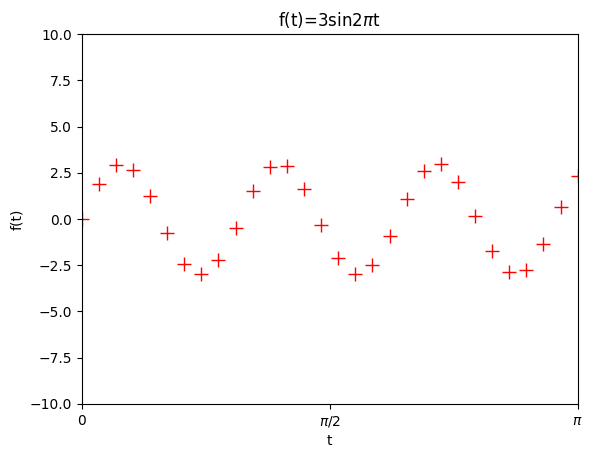

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Set the x limit and y limit
plt.xlim(0, np.pi)
plt.ylim(-10, 10)

# Generate the x values
t = np.linspace(0, np.pi, 30)

# Calculate the y values
f = 3 * np.sin(2 * np.pi * t)

# Plot the function
plt.plot(t, f, 'r+', markersize=10)

# Set the x ticks and labels
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

# Set the labels for x and y axes
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('f(t)=3sin2$\pi$t')

# Show the plot
plt.show()




### Question 5

Does pineapple belong on pizza?  
Tell us what you think in the following Markdown cell. :)

**ANS:** I always find pineapple on pizzas sold by *PizzaHut*, but have no idea whether it is the same for *PizzaHut* in Italy.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()